# ADWR Water Supply and Demand
## 1. Trend Analysis

In [65]:
library(dplyr)
library(tidyverse)
library(ggplot2)
library(glmnet)
library(corrplot)
library(gridExtra)


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [27]:
data = read_csv("Data/AMA Demand Supply from DW .csv")
demand = data %>% filter(CATEGORY == 'Demand'& AMA == 'PHOENIX AMA')
supply = data %>% filter(CATEGORY == 'Supply'& AMA == 'PHOENIX AMA')

Parsed with column specification:
cols(
  YEAR = col_double(),
  AMA = col_character(),
  SECTOR = col_character(),
  CATEGORY = col_character(),
  `PARENT WATER TYPE OR SECTOR` = col_character(),
  `BUDGET ELEMENT` = col_character(),
  QUANTITY = col_double()
)


In [28]:
unique(data$AMA)

[1] "PHOENIX AMA"    "PINAL AMA"      "PRESCOTT AMA"   "SANTA CRUZ AMA"
[5] "TUCSON AMA"

In [29]:
unique(demand$SECTOR)

[1] "Municipal"    "Industrial"   "Agricultural" "Indian"

In [30]:
head(demand)

YEAR,AMA,SECTOR,CATEGORY,PARENT WATER TYPE OR SECTOR,BUDGET ELEMENT,QUANTITY
1985,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Residential Deliveries,308110
1985,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Non-Residential Deliveries,152321
1985,PHOENIX AMA,Municipal,Demand,Municipal,Large Provider Lost and Unaccounted for Water,31656
1985,PHOENIX AMA,Municipal,Demand,Municipal,Small Provider Deliveries,9177
1985,PHOENIX AMA,Municipal,Demand,Municipal,Urban Irrigation,128889
1985,PHOENIX AMA,Municipal,Demand,Municipal,Domestic Exempt Volume,3349


In [31]:
p1 = demand %>% group_by(YEAR,SECTOR) %>% summarise(VOL_acft = sum(QUANTITY)) %>%
    ggplot(aes(YEAR,VOL_acft,color = SECTOR)) + geom_line(size = 1) + xlab("Year") + 
    ylab("Volume (ac-ft)")

`summarise()` regrouping output by 'YEAR' (override with `.groups` argument)


In [32]:
p2 = demand %>% group_by(YEAR) %>% summarise(VOL_acft = sum(QUANTITY)) %>%
    ggplot(aes(YEAR,VOL_acft)) + geom_line(size = 1) + xlab("Year") + 
    ylab("Volume (ac-ft)") +geom_smooth(method = 'lm')

`summarise()` ungrouping output (override with `.groups` argument)


In [33]:
p3 = data %>% filter(CATEGORY == 'Demand' & SECTOR == 'Agricultural') %>% group_by(YEAR, AMA) %>% 
    summarise(VOL_acft = sum(QUANTITY)) %>% ggplot(aes(YEAR,VOL_acft,color = AMA)) + 
    geom_line(size = 1) + xlab("Year") + ylab("Volume (ac-ft)")

`summarise()` regrouping output by 'YEAR' (override with `.groups` argument)


In [34]:
p4 = data %>% filter(CATEGORY == 'Demand' & SECTOR == 'Agricultural') %>% group_by(YEAR) %>% 
    summarise(VOL_acft = sum(QUANTITY)) %>% ggplot(aes(YEAR,VOL_acft)) + 
    geom_line(size = 1) + xlab("Year") + ylab("Volume (ac-ft)")

`summarise()` ungrouping output (override with `.groups` argument)


`summarise()` ungrouping output (override with `.groups` argument)


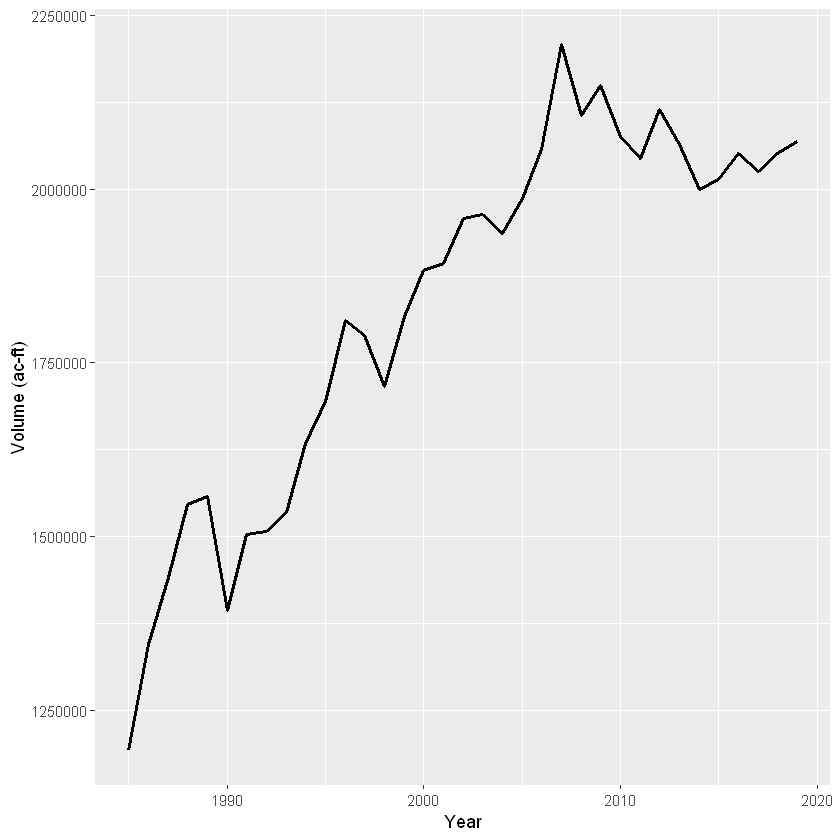

In [84]:
pAGNO = data %>% filter(CATEGORY == 'Demand' & SECTOR != 'Agricultural') %>% group_by(YEAR) %>% 
    summarise(VOL_acft = sum(QUANTITY)) %>% ggplot(aes(YEAR,VOL_acft)) + 
    geom_line(size = 1) + xlab("Year") + ylab("Volume (ac-ft)")

`geom_smooth()` using formula 'y ~ x'


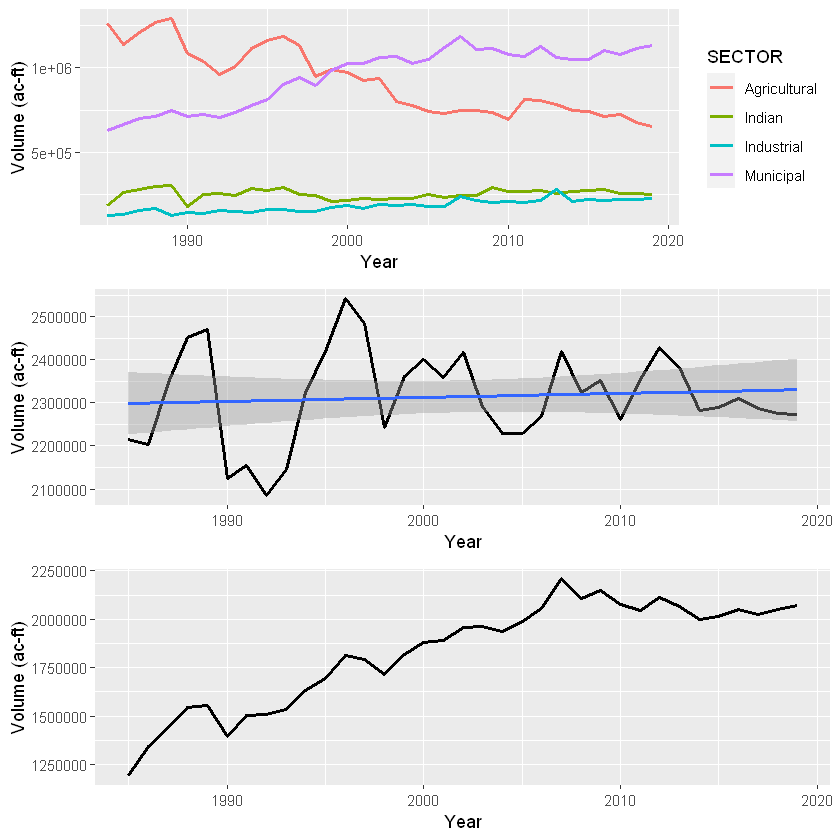

In [102]:
grid.arrange(p1,p2,pAGNO,nrow=3)

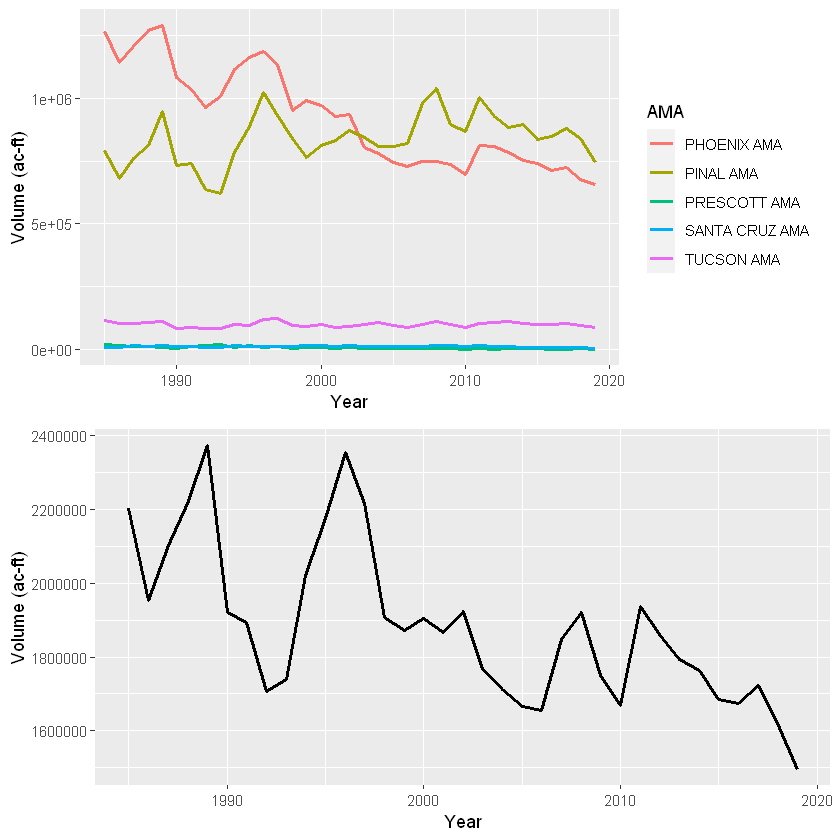

In [101]:
grid.arrange(p3,p4,nrow=2)

In [37]:
head(supply) 

YEAR,AMA,SECTOR,CATEGORY,PARENT WATER TYPE OR SECTOR,BUDGET ELEMENT,QUANTITY
1985,PHOENIX AMA,Municipal,Supply,Groundwater,Groundwater,225094
1985,PHOENIX AMA,Municipal,Supply,Surface Water,Surface Water,360702
1985,PHOENIX AMA,Municipal,Supply,Spill,Spill,47705
1985,PHOENIX AMA,Industrial,Supply,Groundwater,Groundwater,69229
1985,PHOENIX AMA,Industrial,Supply,Surface Water,Surface Water,5810
1985,PHOENIX AMA,Industrial,Supply,Effluent,Effluent,13628


In [38]:
names(supply) = c('YEAR','AMA','SECTOR','CATEGORY','WATER_TYPE','BUDGET_TYPE','QUANTITY')

In [39]:
unique(supply$BUDGET_TYPE)

[1] "Groundwater"                   "Surface Water"                
 [3] "Spill"                         "Effluent"                     
 [5] "Other"                         "CAP"                          
 [7] "Direct Use Effluent"           "Poor Quality GW"              
 [9] "GSF (EFFLUENT)"                "GSF (CAP)"                    
[11] "Excess"                        "Recovered CAP"                
[13] "Recovered Effluent"            "Groundwater Allowance Pumping"
[15] "Weighted Exchange Effluent"    "Recovered Surface Water"      
[17] "Remediation water"             "Surface water"                
[19] "CAP GSF"                       "Recovered Reclaimed"

In [40]:
p5 = supply %>% filter(WATER_TYPE=='CAP'|WATER_TYPE=='Groundwater'|WATER_TYPE=='Surface Water') %>% 
    group_by(YEAR,WATER_TYPE) %>% summarise(VOL_acft = sum(QUANTITY)) %>% ggplot(aes(YEAR,VOL_acft,color = WATER_TYPE)) + 
    geom_line(size = 1) + xlab("Year") + ylab("Volume (ac-ft)")

`summarise()` regrouping output by 'YEAR' (override with `.groups` argument)


In [41]:
p6 = supply %>% filter(WATER_TYPE=='CAP'|WATER_TYPE=='Groundwater'|WATER_TYPE=='Surface Water') %>% 
    group_by(YEAR) %>% summarise(VOL_acft = sum(QUANTITY)) %>% ggplot(aes(YEAR,VOL_acft)) + 
    geom_line(size = 1) + xlab("Year") + ylab("Volume (ac-ft)") + geom_smooth(method = 'lm')

`summarise()` ungrouping output (override with `.groups` argument)


In [42]:
p7 = supply %>% filter(WATER_TYPE=='Groundwater'|WATER_TYPE=='Surface Water') %>% 
    group_by(YEAR) %>% summarise(VOL_acft = sum(QUANTITY)) %>% ggplot(aes(YEAR,VOL_acft)) + 
    geom_line(size = 1) + xlab("Year") + ylab("Volume (ac-ft)")

`summarise()` ungrouping output (override with `.groups` argument)


`geom_smooth()` using formula 'y ~ x'


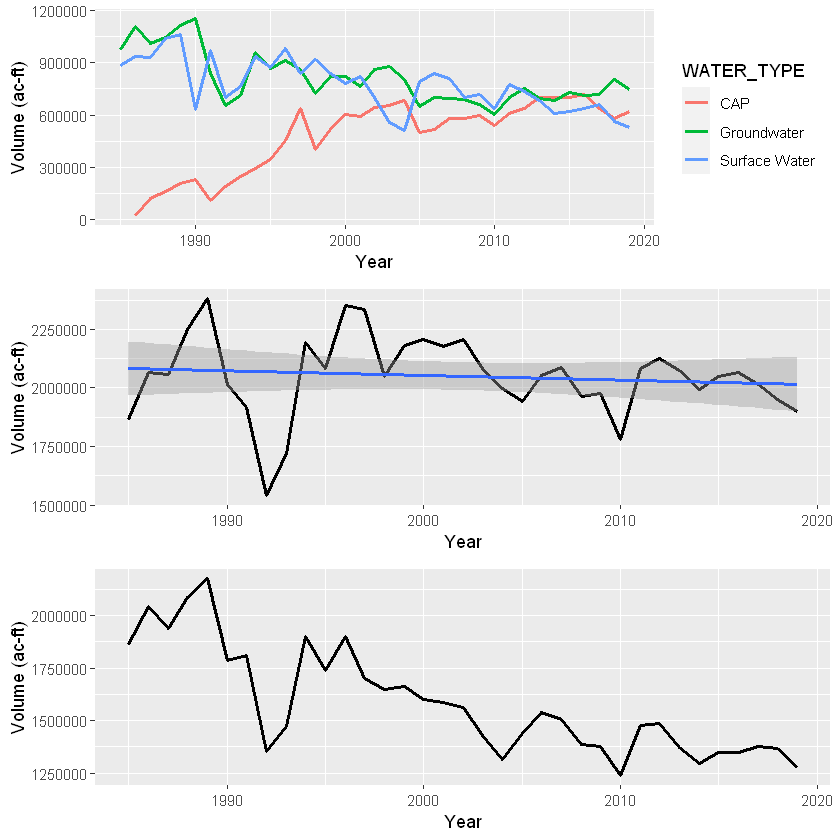

In [43]:
grid.arrange(p5,p6,p7)

## 2. Modelling

In [79]:
glob = read_csv("Data/glob.csv")
pop = read_csv("Data/population.csv")

Parsed with column specification:
cols(
  Year = col_double(),
  Temp = col_double(),
  CO2 = col_double(),
  CH4 = col_double(),
  sunspot = col_double(),
  volcanic = col_double()
)
Parsed with column specification:
cols(
  date = col_double(),
  Population = col_double(),
  `Annual Change` = col_double()
)


### Inflow Models

In [94]:
glob85 = glob %>% filter(Year >= 1985)
sw = supply %>% filter(WATER_TYPE == 'Surface Water') %>% group_by(YEAR) %>% summarise(VOLUME = sum(QUANTITY)) %>%
    left_join(glob85, by = c(YEAR='Year'))
sw_mod = lm(VOLUME ~ CO2, data = sw)
summary(sw_mod)

`summarise()` ungrouping output (override with `.groups` argument)



Call:
lm(formula = VOLUME ~ CO2, data = sw)

Residuals:
    Min      1Q  Median      3Q     Max 
-252581  -39939   20077   81185  169198 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2775734     487046   5.699 4.12e-06 ***
CO2            -5349       1317  -4.063 0.000355 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 113000 on 28 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.3709,	Adjusted R-squared:  0.3484 
F-statistic: 16.51 on 1 and 28 DF,  p-value: 0.0003551


In [95]:
gw = supply %>% filter(WATER_TYPE == 'Groundwater') %>% group_by(YEAR) %>% summarise(VOLUME = sum(QUANTITY)) %>%
    left_join(glob85, by = c(YEAR='Year'))
gw_mod = lm(VOLUME ~ CO2, data = gw)
summary(gw_mod)

`summarise()` ungrouping output (override with `.groups` argument)



Call:
lm(formula = VOLUME ~ CO2, data = gw)

Residuals:
    Min      1Q  Median      3Q     Max 
-270595  -40725   -9258   62030  213532 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3488741     445997   7.822 1.61e-08 ***
CO2            -7211       1206  -5.981 1.93e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 103500 on 28 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.5609,	Adjusted R-squared:  0.5452 
F-statistic: 35.77 on 1 and 28 DF,  p-value: 1.928e-06


In [98]:
cap = supply %>% filter(WATER_TYPE == 'CAP') %>% group_by(YEAR) %>% summarise(VOLUME = sum(QUANTITY)) %>%
    left_join(glob85, by = c(YEAR='Year'))
cap_mod = lm(VOLUME ~ CO2, data = cap)
summary(cap_mod)

`summarise()` ungrouping output (override with `.groups` argument)



Call:
lm(formula = VOLUME ~ CO2, data = cap)

Residuals:
    Min      1Q  Median      3Q     Max 
-164755  -70721  -38134  100457  270929 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3782473     504672  -7.495 4.61e-08 ***
CO2            11428       1361   8.395 5.25e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 111900 on 27 degrees of freedom
  (5 observations deleted due to missingness)
Multiple R-squared:  0.723,	Adjusted R-squared:  0.7128 
F-statistic: 70.48 on 1 and 27 DF,  p-value: 5.252e-09


### Outflow Models

In [88]:
demQ = demand %>% filter(SECTOR != 'Agricultural') %>% group_by(YEAR) %>% summarise(VOLUME = sum(QUANTITY))
names(pop) = c('YEAR','POPULATION','PERCENT_DIF')
pop = pop %>% filter(YEAR>=1985)
popdem = demQ %>% left_join(pop, by = 'YEAR')
popdem_mod = lm(VOLUME ~ POPULATION, data = popdem)
summary(popdem_mod)

`summarise()` ungrouping output (override with `.groups` argument)



Call:
lm(formula = VOLUME ~ POPULATION, data = popdem)

Residuals:
    Min      1Q  Median      3Q     Max 
-138271  -68974   17444   50091  190673 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.003e+05  4.978e+04   14.07 1.70e-15 ***
POPULATION  2.286e-01  1.588e-02   14.40 8.75e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 77040 on 33 degrees of freedom
Multiple R-squared:  0.8627,	Adjusted R-squared:  0.8585 
F-statistic: 207.3 on 1 and 33 DF,  p-value: 8.751e-16


In [90]:
popmod = lm(POPULATION ~ YEAR, data = popdem)
summary(popmod)


Call:
lm(formula = POPULATION ~ YEAR, data = popdem)

Residuals:
   Min     1Q Median     3Q    Max 
-33710 -22906  -4794  20538  58869 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.595e+08  9.161e+05  -174.1   <2e-16 ***
YEAR         8.118e+04  4.576e+02   177.4   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 27340 on 33 degrees of freedom
Multiple R-squared:  0.999,	Adjusted R-squared:  0.9989 
F-statistic: 3.147e+04 on 1 and 33 DF,  p-value: < 2.2e-16


In [89]:
aggQ = demand %>% filter(SECTOR == 'Agricultural') %>% group_by(YEAR) %>% summarise(VOLUME = sum(QUANTITY))
aggdem_mod = lm(VOLUME ~ YEAR, data = aggQ)
summary(aggdem_mod)

`summarise()` ungrouping output (override with `.groups` argument)



Call:
lm(formula = VOLUME ~ YEAR, data = aggQ)

Residuals:
    Min      1Q  Median      3Q     Max 
-136843  -70321   14431   49346  158376 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 36245417    2757611   13.14 1.15e-14 ***
YEAR          -17644       1377  -12.81 2.35e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 82300 on 33 degrees of freedom
Multiple R-squared:  0.8326,	Adjusted R-squared:  0.8275 
F-statistic: 164.1 on 1 and 33 DF,  p-value: 2.347e-14
